In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09170396 0.02505247 0.07319581 0.03040907 0.12755274 0.02538265
 0.07137648 0.12783749 0.08191794 0.02756853 0.02734592 0.29065695]


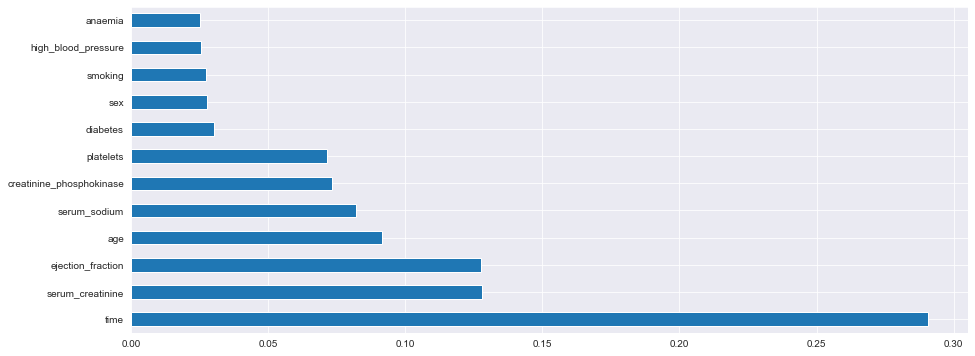

In [5]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# We will select only 3 features : time, ejection_fraction, serum_creatinine

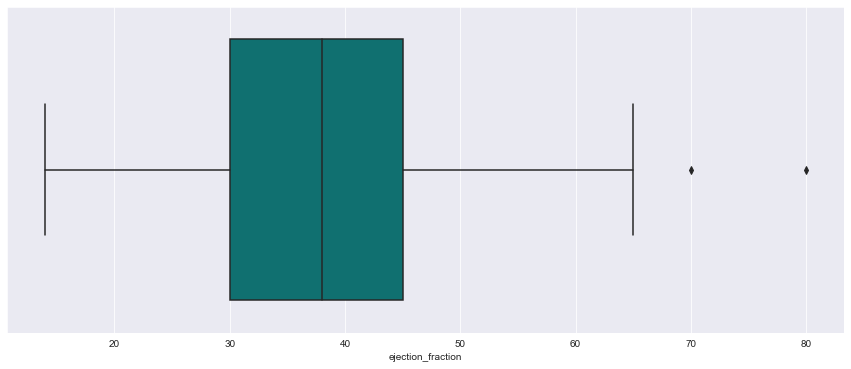

In [6]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

In [7]:
# We can see there are two outliers. Lets remove them
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


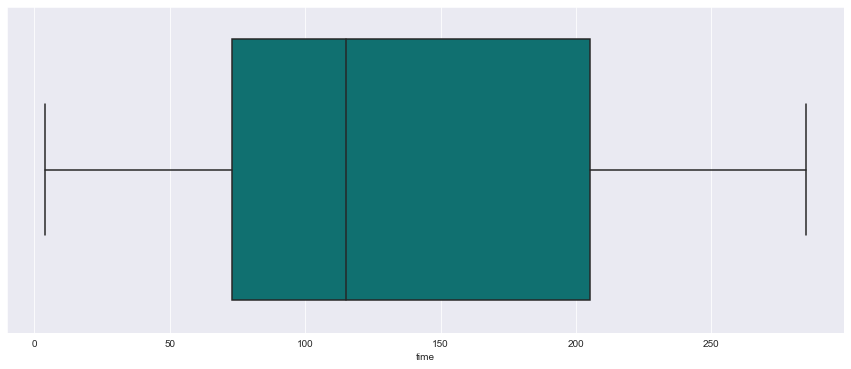

In [8]:
dataset = dataset[dataset['ejection_fraction']<70]
# Finding outliers in time
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

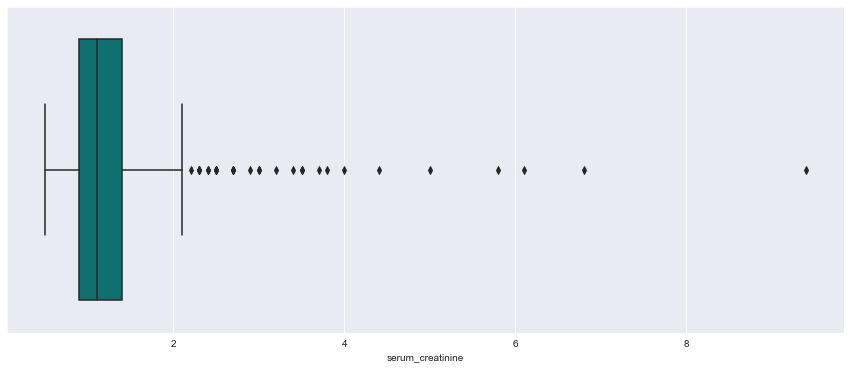

In [9]:
# No outliers in time.
# Boxplot for ejection_fraction
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

# Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
# Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

# When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT. 

In [11]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [12]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [13]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()